In [9]:
# Final Project - Neil Gurnani

# import neccesary modules
import json
import pandas as pd

# Open the data file and load the json data into the variable crime_list
file = open('FBI_CrimeData_2016.json', 'r')
crime_list_str = file.read()
crime_list = json.loads(crime_list_str)

# create 3 dictionaries
murder_by_key = {}
violent_by_key = {}
nonviolent_by_key = {}

# 3 functions for crime dictionaries
def accume_crime(key, crime, crime_list):
    murder_by_key = {}
    for i in crime_list:
        if i[key] not in murder_by_key:
            murder_by_key[i[key]] = int(i['Murder'])
        else:
            murder_by_key[i[key]] += int(i['Murder'])
    return murder_by_key

def accume_violent_crime(key, crime, crime_list):
    violent_by_key = {}
    for i in crime_list:
        if i[key] not in violent_by_key:
            violent_by_key[i[key]] = int(i['Murder']) + int(i['Rape']) + int(i['Robbery']) + int(i['Assault'])
        else:
            violent_by_key[i[key]] += int(i['Murder']) + int(i['Rape']) + int(i['Robbery']) + int(i['Assault'])
    return violent_by_key

def accume_nonviolent_crime(key, crime, crime_list):
    nonviolent_by_key = {}
    for i in crime_list:
        if i[key] not in nonviolent_by_key:
            nonviolent_by_key[i[key]] = int(i['Burglary']) + int(i['Theft']) + int (i['Vehicle_Theft'])
        else:
            nonviolent_by_key[i[key]] += int(i['Burglary']) + int(i['Theft']) + int(i['Vehicle_Theft'])
    return nonviolent_by_key

# call the 3 functions to generate dictionaries
murder_by_region = accume_crime('Region', 'Murder', crime_list)
violent_by_region = accume_violent_crime('Region', 'Murder' 'Rape' 'Robbery' 'Assault', crime_list )
nonviolent_by_region = accume_nonviolent_crime('Region', 'Burglary' 'Theft' 'Vehicle_Theft', crime_list)
        
# print out 3 important dictionaries 
print(murder_by_region)
print(violent_by_region)
print(nonviolent_by_region)
        

{'South': 5018, 'West': 2605, 'Northeast': 1674, 'Midwest': 3304}
{'South': 331011, 'West': 259401, 'Northeast': 156891, 'Midwest': 211854}
{'South': 2080097, 'West': 1781665, 'Northeast': 760200, 'Midwest': 1226462}


In [4]:
# Now comes the graphing
# 3 functions for creating 3 distinct bar charts 

# Print both the data frame and bar chart for Murders 

def murderBarChart(murder_by_region):
    numbers = [0,1,2,3]
    region = list(murder_by_region.keys())
    murders = list(murder_by_region.values())
    pdDict = {'Incidents':pd.Series(murders, index = numbers), 'Region':pd.Series(region, index = numbers)}
    df = pd.DataFrame(pdDict)
    print('Murders by Region')
    print(df)
    df.plot.bar(x = 'Region', y = 'Incidents', legend = False)


murderBarChart(murder_by_region)

Murders by Region
   Incidents     Region
0       5018      South
1       2605       West
2       1674  Northeast
3       3304    Midwest


Violent Crimes by Region
   Incidents     Region
0     331011      South
1     259401       West
2     156891  Northeast
3     211854    Midwest


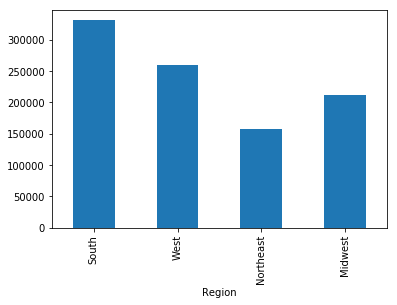

In [5]:
# Print both the data frame and bar chart for Violent Crimes

def violentBarChart(violent_by_region):
    numbers = [0,1,2,3]
    region = list(violent_by_region.keys())
    violents = list(violent_by_region.values())
    pdDict = {'Incidents':pd.Series(violents, index = numbers), 'Region':pd.Series(region, index = numbers)}
    df = pd.DataFrame(pdDict)
    print('Violent Crimes by Region')
    print(df)
    df.plot.bar(x = 'Region', y = 'Incidents', legend = False)


violentBarChart(violent_by_region)

Non-violent Crimes by Region
   Incidents     Region
0    2080097      South
1    1781665       West
2     760200  Northeast
3    1226462    Midwest


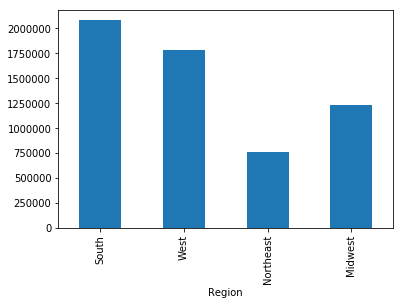

In [6]:
# Print both the data frame and bar chart for Nonviolent Crimes

def nonviolentBarChart(nonviolent_by_region):
    numbers = [0,1,2,3]
    region = list(nonviolent_by_region.keys())
    nonviolents = list(nonviolent_by_region.values())
    pdDict = {'Incidents':pd.Series(nonviolents, index = numbers), 'Region':pd.Series(region, index = numbers)}
    df = pd.DataFrame(pdDict)
    print('Non-violent Crimes by Region')
    print(df)
    df.plot.bar(x = 'Region', y = 'Incidents', legend = False)

    
nonviolentBarChart(nonviolent_by_region)
    

In [7]:
# next, time to calculate the national violent crime mean (average)
totalViolentCrimes = 0
statesList = []
numStates = 0

for i in violent_by_region.values():
    totalViolentCrimes = totalViolentCrimes + i
# print(totalViolentCrimes)
# now calculate national crime mean (average)
for i in crime_list:
    if i['State'] not in statesList:
        statesList.append(i['State'])
print(statesList)
print(len(statesList))

# assign the length of the list of states to the variable numstates
numStates = len(statesList)
        
avgViolentCrimeRate = totalViolentCrimes / numStates
print("The National Violent Crime Mean (average) is: ", avgViolentCrimeRate)
    

['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA', 'COLORADO', 'CONNECTICUT', 'DELAWARE', 'DISTRICT OF COLUMBIA', 'FLORIDA', 'GEORGIA', 'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE', 'MARYLAND', 'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI', 'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW HAMPSHIRE', 'NEW JERSEY', 'NEW MEXICO', 'NEW YORK', 'NORTH CAROLINA', 'NORTH DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON', 'PENNSYLVANIA', 'RHODE ISLAND', 'SOUTH CAROLINA', 'SOUTH DAKOTA', 'TENNESSEE', 'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON', 'WEST VIRGINIA', 'WISCONSIN', 'WYOMING']
51
The National Violent Crime Mean (average) is:  18807.0


In [81]:
# Finally, let us create the summary of data for the states
print("National Average Violent Crime Rate: ", int(avgViolentCrimeRate))

violent_by_state = {}

# now, create summary by calling violent crime function created earlier
violent_by_state = accume_violent_crime('State', 'Murder' 'Rape' 'Robbery' 'Assault' , crime_list)

#print(violent_by_state)

# iterate through the dict to produce the tabular list showing the crimes by state and their respective distance from means

distMean = 0

state = list(violent_by_state.keys())
crimes = list(violent_by_state.values())

meanDists = []

#print(avgViolentCrimeRate)

for i in violent_by_state.values():
    distMean = int(i) - int(avgViolentCrimeRate)
    #print(distMean)
    meanDists.append(distMean)
#print(meanDists)

    
pdDict = {'Crimes':pd.Series(crimes, index = state), 'Distance from Mean':pd.Series(meanDists, index = state),}



df = pd.DataFrame(pdDict)
df.index.rename('State', inplace=True)


# Could not figure out how to align the column headings

print(' ')
print(df)



National Average Violent Crime Rate:  18807
 
                      Crimes  Distance from Mean
State                                           
ALABAMA                15350               -3457
ALASKA                  4697              -14110
ARIZONA                23856                5049
ARKANSAS               12048               -6759
CALIFORNIA            145205              126398
COLORADO               15533               -3274
CONNECTICUT             7754              -11053
DELAWARE                2359              -16448
DISTRICT OF COLUMBIA    7711              -11096
FLORIDA                50540               31733
GEORGIA                18496                -311
HAWAII                  3331              -15476
IDAHO                   2676              -16131
ILLINOIS               50968               32161
INDIANA                21325                2518
IOWA                    7533              -11274
KANSAS                  7982              -10825
KENTUCKY               